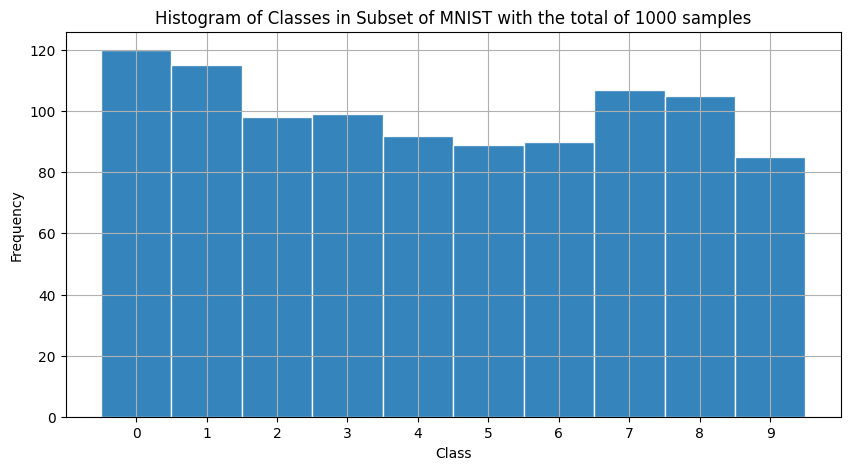

In [22]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
transform = transforms.Compose([transforms.ToTensor()])
mnist_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
subset_indices = np.random.choice(len(mnist_dataset), 1000, replace=False)
subset = torch.utils.data.Subset(mnist_dataset, subset_indices)
class_labels = [mnist_dataset.targets[idx] for idx in subset_indices]
plt.figure(figsize=(10, 5))
plt.hist(class_labels, bins=np.arange(11) - 0.5, edgecolor='White', alpha=0.9)
plt.xticks(np.arange(10))
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Histogram of Classes in Subset of MNIST with the total of 1000 samples')
plt.grid(True)
plt.show()


In [24]:
pip install einops

Note: you may need to restart the kernel to use updated packages.


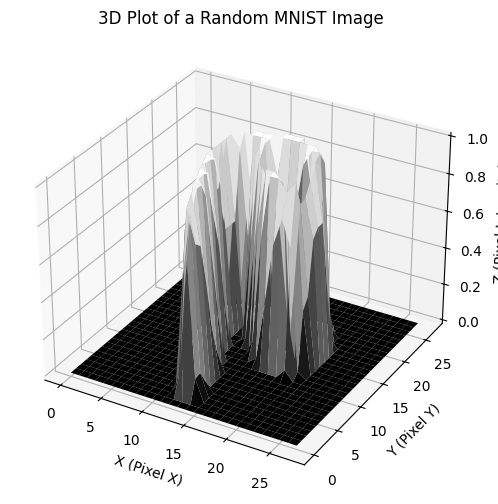

In [1]:
import torch
import numpy as np
from einops import rearrange
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
transform = transforms.Compose([transforms.ToTensor()])
mnist_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
subset_indices = np.random.choice(len(mnist_dataset), 1000, replace=False)
subset = torch.utils.data.Subset(mnist_dataset, subset_indices)
images = torch.stack([mnist_dataset.data[idx] for idx in subset_indices])
images = images.unsqueeze(1).float() / 255.0
batches = rearrange(images, '(b n) c h w -> b n c h w', b=40, n=25)
batch_idx = np.random.randint(0, batches.shape[0])
sample_idx = np.random.randint(0, batches.shape[1])
selected_image = batches[batch_idx, sample_idx, 0, :, :]
x = np.arange(0, 28)
y = np.arange(0, 28)
x, y = np.meshgrid(x, y)
z = selected_image.numpy()
fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='gray')
ax.set_xlabel('X (Pixel X)')
ax.set_ylabel('Y (Pixel Y)')
ax.set_zlabel('Z (Pixel Intensity)')
ax.set_title('3D Plot of a Random MNIST Image')
plt.show()